In [15]:
!pip install textblob wordcloud

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud

In [17]:
file_path = "finalDataset0.2.xlsx"  # Replace with your file path if different
df = pd.read_excel(file_path)

In [18]:
aspects = [
    ("teaching", "teaching.1"),
    ("coursecontent", "coursecontent.1"),
    ("examination", "Examination"),
    ("labwork", "labwork.1"),
    ("library_facilities", "library_facilities"),
    ("extracurricular", "extracurricular.1")
]

records = []
for rating_col, comment_col in aspects:
    for idx, row in df.iterrows():
        rating = row[rating_col]
        comment = row[comment_col]
        if pd.notna(rating):
            records.append({
                "Aspect": rating_col.replace('_', ' ').title(),
                "Rating": pd.to_numeric(rating, errors='coerce'),
                "Comment": str(comment)
            })

feedback_df = pd.DataFrame(records)

In [23]:
def get_sentiment(comment):
    if not comment or comment.strip() == "":
        return "Neutral"
    blob = TextBlob(comment)
    polarity = blob.sentiment.polarity
    if polarity > 0.1:
        return "Positive"
    elif polarity < -0.1:
        return "Negative"
    else:
        return "Neutral"

feedback_df["Sentiment"] = feedback_df["Comment"].apply(get_sentiment)


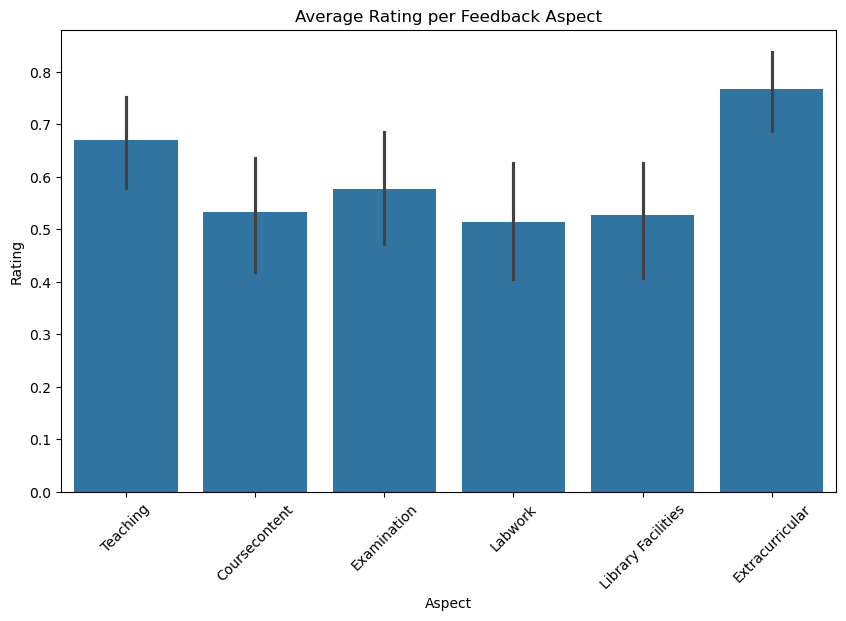

In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(data=feedback_df, x="Aspect", y="Rating", estimator="mean")
plt.title("Average Rating per Feedback Aspect")
plt.xticks(rotation=45)
plt.show()

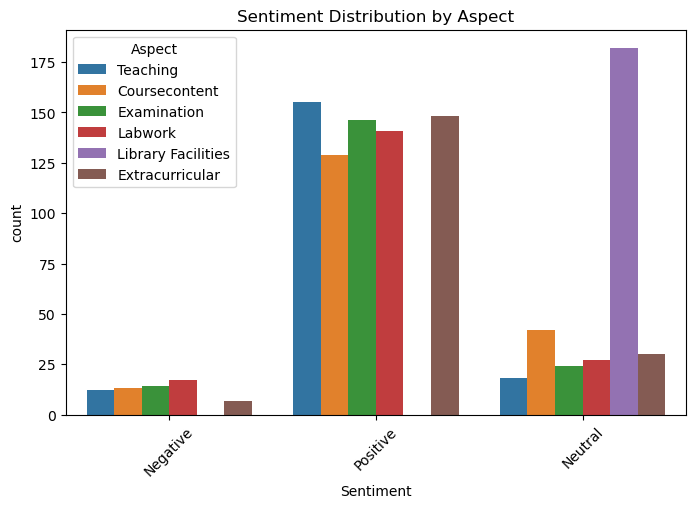

In [27]:
plt.figure(figsize=(8, 5))
sns.countplot(data=feedback_df, x="Sentiment", hue="Aspect")
plt.title("Sentiment Distribution by Aspect")
plt.xticks(rotation=45)
plt.show()

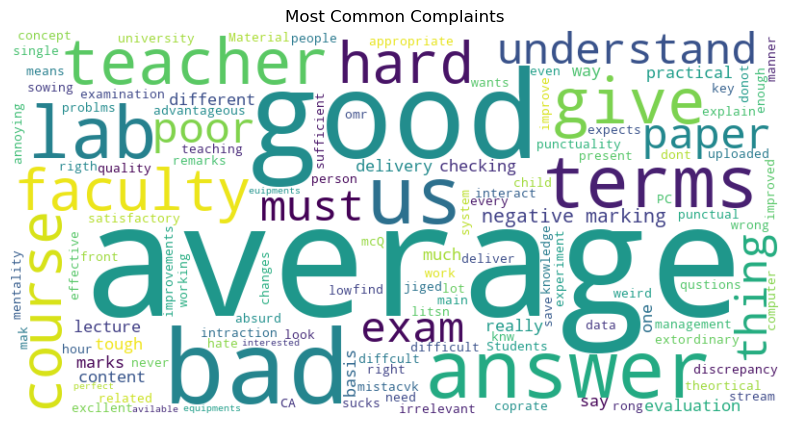

In [29]:
negative_comments = " ".join(feedback_df[feedback_df['Sentiment'] == 'Negative']['Comment'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_comments)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Complaints")
plt.show()

In [31]:
# 📈 4. Top 3 Highest-Rated Aspects
top_avg = feedback_df.groupby("Aspect")["Rating"].mean().sort_values(ascending=False).head(3)
print("🏆 Top 3 Most Satisfying Aspects:")
print(top_avg)

# 📌 5. Summary Recommendations
print("\n📌 Recommendations:")
for aspect in feedback_df["Aspect"].unique():
    avg_rating = feedback_df[feedback_df["Aspect"] == aspect]["Rating"].mean()
    neg_count = (feedback_df[(feedback_df["Aspect"] == aspect) & (feedback_df["Sentiment"] == "Negative")]).shape[0]
    if avg_rating < 3.5 or neg_count > 10:
        print(f"- Improve '{aspect}': Avg Rating = {avg_rating:.2f}, Negative Comments = {neg_count}")
    else:
        print(f"- '{aspect}' is doing well ✅ (Avg Rating: {avg_rating:.2f})")

🏆 Top 3 Most Satisfying Aspects:
Aspect
Extracurricular    0.767568
Teaching           0.670270
Examination        0.576087
Name: Rating, dtype: float64

📌 Recommendations:
- Improve 'Teaching': Avg Rating = 0.67, Negative Comments = 12
- Improve 'Coursecontent': Avg Rating = 0.53, Negative Comments = 13
- Improve 'Examination': Avg Rating = 0.58, Negative Comments = 14
- Improve 'Labwork': Avg Rating = 0.51, Negative Comments = 17
- Improve 'Library Facilities': Avg Rating = 0.53, Negative Comments = 0
- Improve 'Extracurricular': Avg Rating = 0.77, Negative Comments = 7


C:\Users\Hiya\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129383 (\N{PIE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


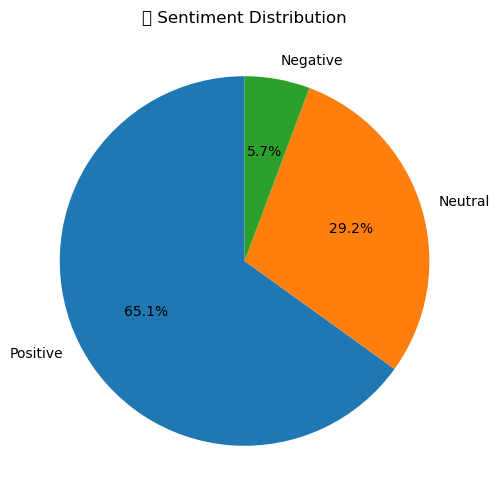

In [35]:
feedback_df['Sentiment'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    figsize=(6,6),
    title="🥧 Sentiment Distribution"
)
plt.ylabel('')
plt.show()


C:\Users\Hiya\AppData\Local\Temp\ipykernel_15584\4094492826.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=feedback_df, x='Aspect', y='Rating', estimator='mean', ci=None, marker='o')
C:\Users\Hiya\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


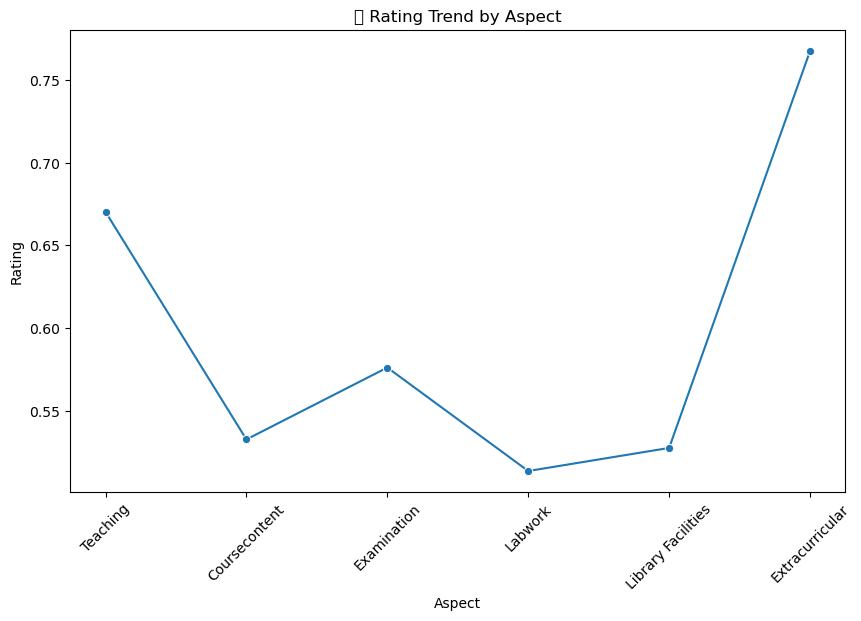

In [37]:
plt.figure(figsize=(10,6))
sns.lineplot(data=feedback_df, x='Aspect', y='Rating', estimator='mean', ci=None, marker='o')
plt.title("📈 Rating Trend by Aspect")
plt.xticks(rotation=45)
plt.show()


C:\Users\Hiya\AppData\Local\Temp\ipykernel_15584\2484585069.py:8: UserWarning: Glyph 128307 (\N{WHITE SQUARE BUTTON}) missing from current font.
  plt.tight_layout()
C:\Users\Hiya\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128307 (\N{WHITE SQUARE BUTTON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


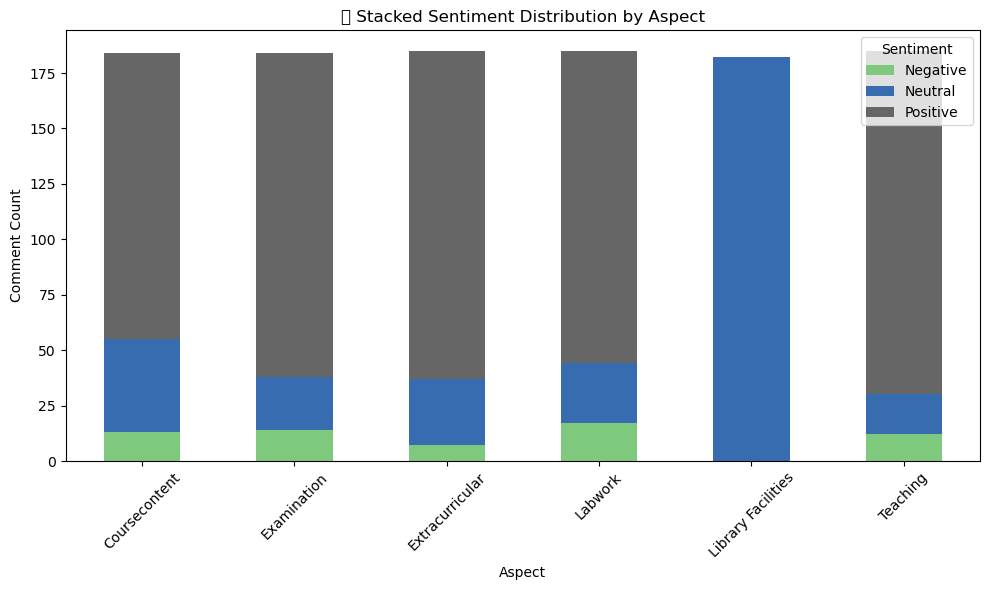

In [41]:
sentiment_counts = pd.crosstab(feedback_df['Aspect'], feedback_df['Sentiment'])
sentiment_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Accent')
plt.title("🔳 Stacked Sentiment Distribution by Aspect")
plt.xlabel("Aspect")
plt.ylabel("Comment Count")
plt.xticks(rotation=45)
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()


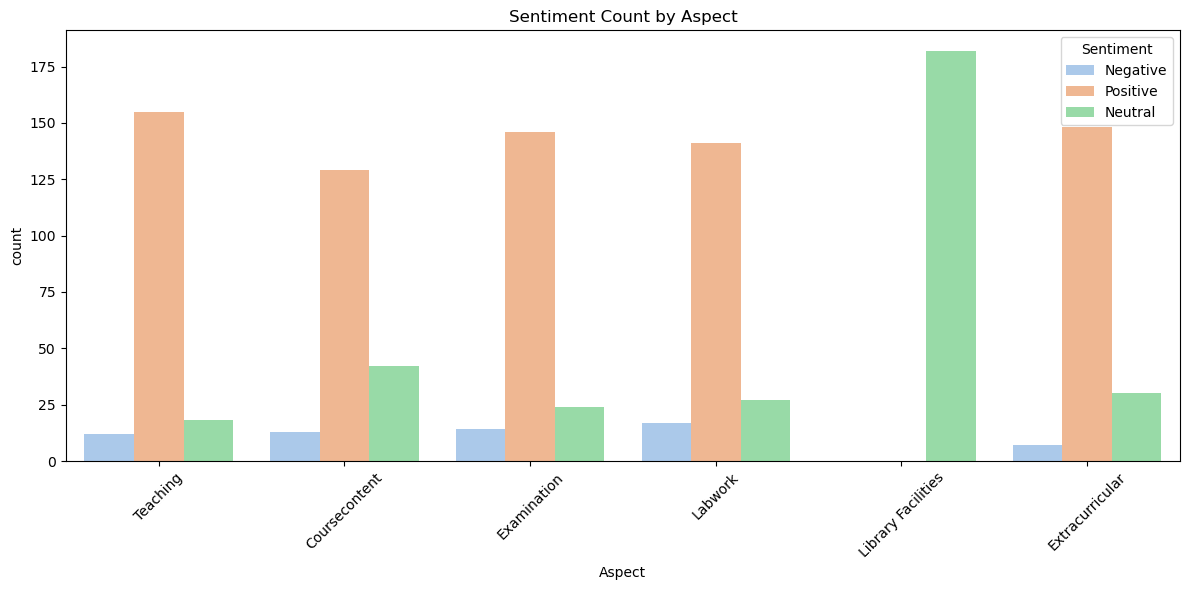

In [45]:
# Sentiment per aspect count
plt.figure(figsize=(12,6))
sns.countplot(data=feedback_df, x="Aspect", hue="Sentiment", palette="pastel")
plt.title("Sentiment Count by Aspect")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


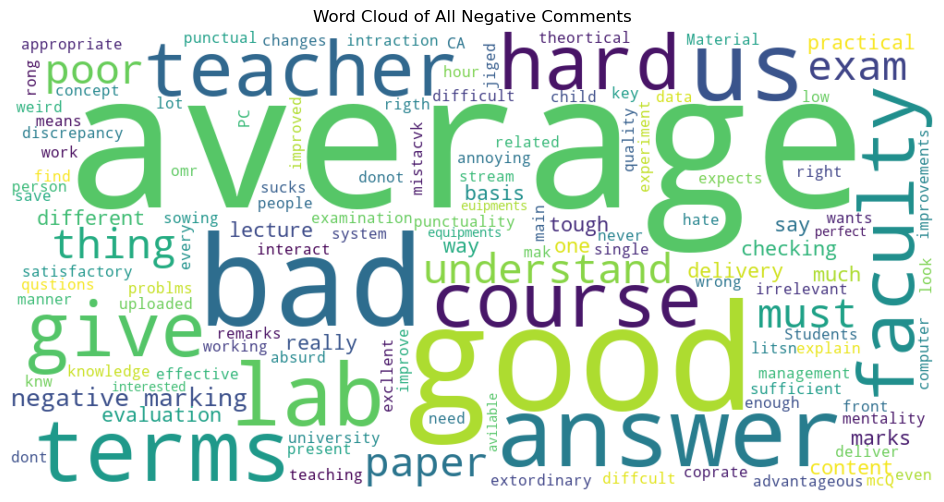

In [63]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Filter for negative comments
negative_comments_all = feedback_df[feedback_df['Sentiment'] == 'Negative']['Comment']

# Join all comments into one string
combined_text = " ".join(negative_comments_all)

# Create and display the word cloud
wordcloud = WordCloud(
    width=1000,
    height=500,
    background_color='white',
    stopwords=STOPWORDS
).generate(combined_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of All Negative Comments")
plt.show()


C:\Users\Hiya\AppData\Local\Temp\ipykernel_15584\1015233850.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dept_rating.values, y=dept_rating.index, palette="viridis")
C:\Users\Hiya\AppData\Local\Temp\ipykernel_15584\1015233850.py:16: UserWarning: Glyph 127942 (\N{TROPHY}) missing from current font.
  plt.tight_layout()
C:\Users\Hiya\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127942 (\N{TROPHY}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


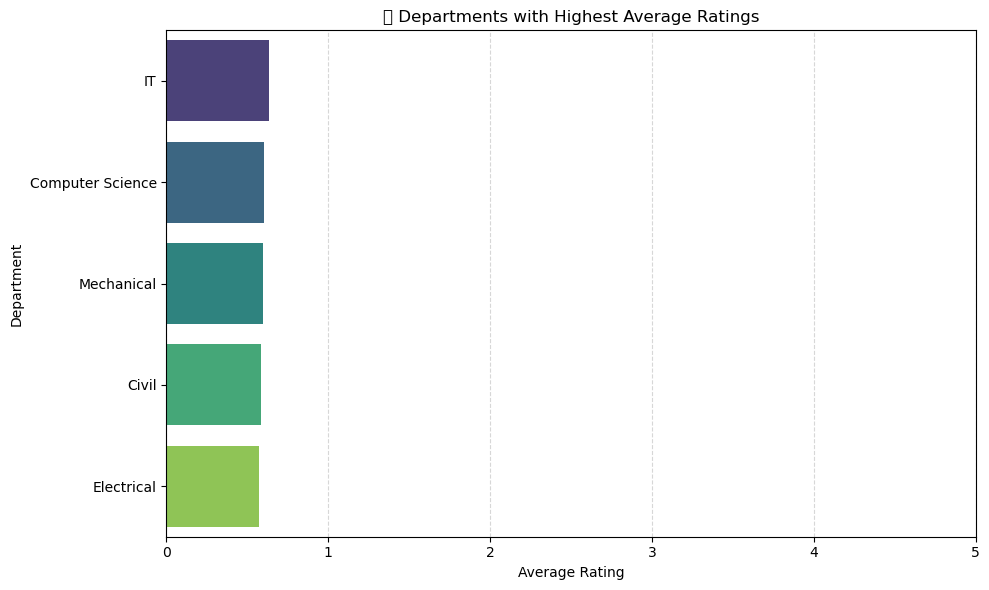

In [67]:
import random
departments = ['Computer Science', 'Mechanical', 'Civil', 'Electrical', 'IT']
feedback_df['Department'] = [random.choice(departments) for _ in range(len(feedback_df))]

# 📊 Average rating per department
dept_rating = feedback_df.groupby("Department")["Rating"].mean().sort_values(ascending=False)

# 🔧 Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=dept_rating.values, y=dept_rating.index, palette="viridis")
plt.xlabel("Average Rating")
plt.ylabel("Department")
plt.title("🏆 Departments with Highest Average Ratings")
plt.xlim(0, 5)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

C:\Users\Hiya\AppData\Local\Temp\ipykernel_15584\981751367.py:6: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
C:\Users\Hiya\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


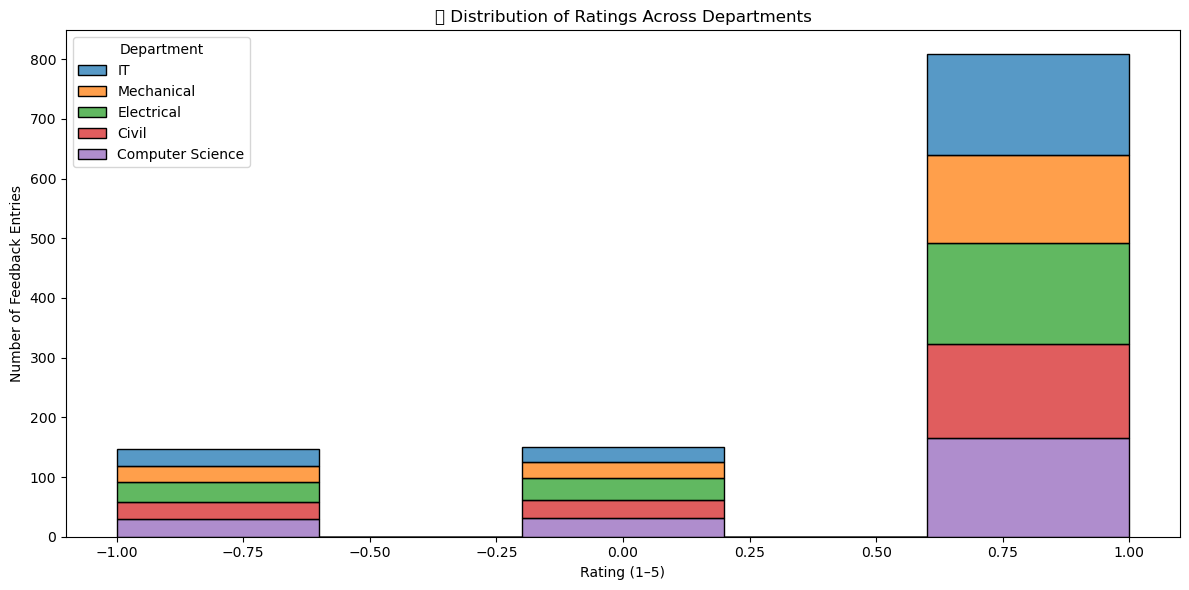

In [71]:
plt.figure(figsize=(12, 6))
sns.histplot(data=feedback_df, x="Rating", hue="Department", multiple="stack", bins=5)
plt.title("📊 Distribution of Ratings Across Departments")
plt.xlabel("Rating (1–5)")
plt.ylabel("Number of Feedback Entries")
plt.tight_layout()
plt.show()


C:\Users\Hiya\AppData\Local\Temp\ipykernel_15584\3633341680.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dept_rating.values, y=dept_rating.index, palette="viridis")
C:\Users\Hiya\AppData\Local\Temp\ipykernel_15584\3633341680.py:13: UserWarning: Glyph 127942 (\N{TROPHY}) missing from current font.
  plt.tight_layout()
C:\Users\Hiya\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127942 (\N{TROPHY}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


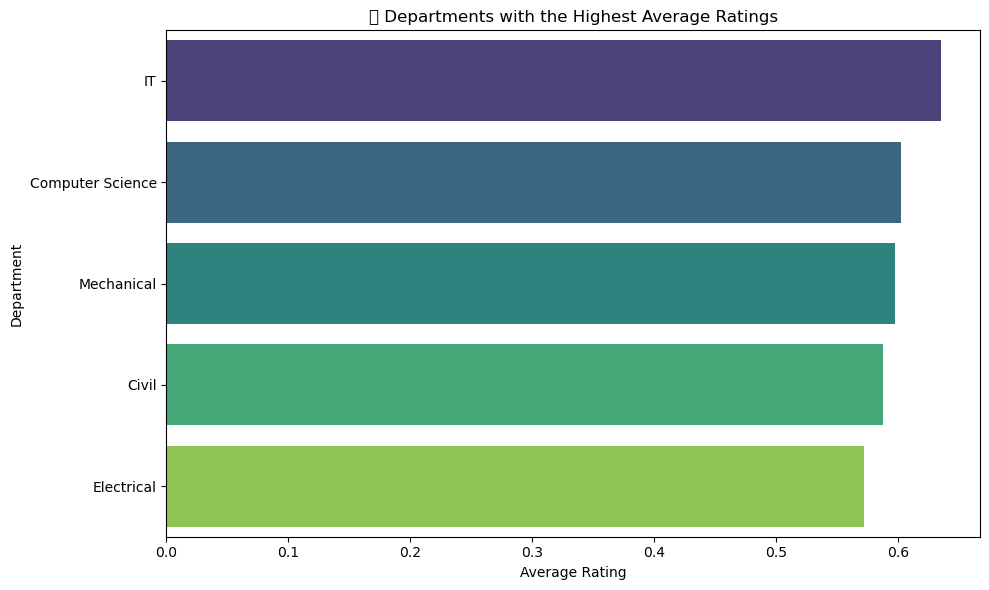

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average rating by department
dept_rating = feedback_df.groupby("Department")["Rating"].mean().sort_values(ascending=False)

# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=dept_rating.values, y=dept_rating.index, palette="viridis")
plt.xlabel("Average Rating")
plt.ylabel("Department")
plt.title("🏆 Departments with the Highest Average Ratings")
plt.tight_layout()
plt.show()


C:\Users\Hiya\AppData\Local\Temp\ipykernel_13256\2608259171.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_ratings.values, y=avg_ratings.index, palette="Reds_r")


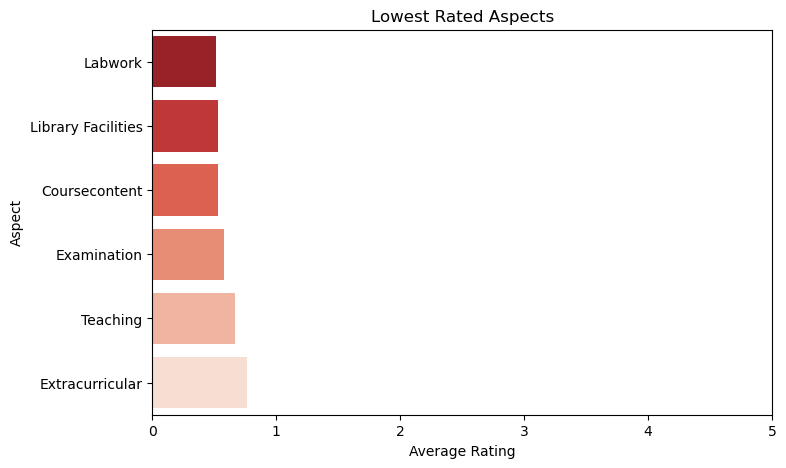

In [5]:
avg_ratings = feedback_df.groupby("Aspect")["Rating"].mean().sort_values()

plt.figure(figsize=(8, 5))
sns.barplot(x=avg_ratings.values, y=avg_ratings.index, palette="Reds_r")
plt.title("Lowest Rated Aspects")
plt.xlabel("Average Rating")
plt.ylabel("Aspect")
plt.xlim(0, 5)
plt.show()


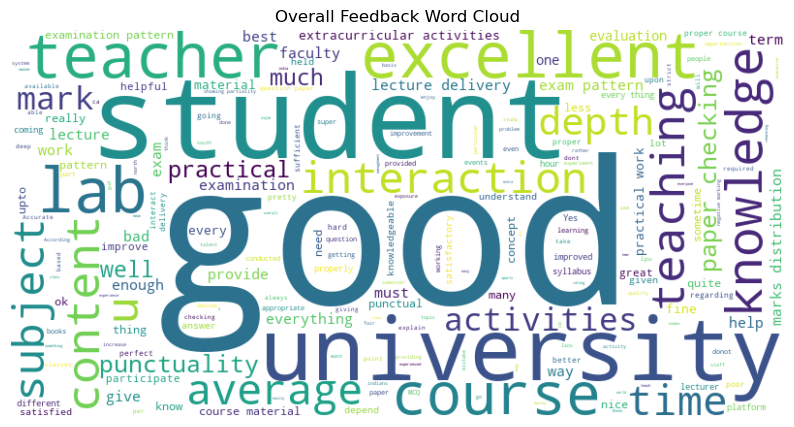

In [15]:

# -------------------------
# 5️⃣ Overall WordCloud (All Comments)
# -------------------------
all_comments = " ".join(feedback_df["Comment"].dropna().astype(str))
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_comments)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Overall Feedback Word Cloud")
plt.show()


In [13]:
# -------------------------
# 6️⃣ Recommendations for Event Organizers
# -------------------------
recommendations = []
avg_ratings = feedback_df.groupby("Aspect")["Rating"].mean()
neg_percent = feedback_df.groupby("Aspect")["SentimentLabel"].apply(lambda x: (x=="Negative").mean()*100)

for aspect in avg_ratings.index:
    if avg_ratings[aspect] < 3.5 or neg_percent[aspect] > 30:
        recommendations.append(f"🔴 Improve '{aspect}' — Avg Rating: {avg_ratings[aspect]:.2f}, Negativity: {neg_percent[aspect]:.1f}%")
    else:
        recommendations.append(f"🟢 Maintain quality in '{aspect}' — Avg Rating: {avg_ratings[aspect]:.2f}")

print("\n📌 Key Recommendations for Event Organizers:")
for rec in recommendations:
    print(rec)


📌 Key Recommendations for Event Organizers:
🔴 Improve 'Coursecontent' — Avg Rating: 0.53, Negativity: 7.1%
🔴 Improve 'Examination' — Avg Rating: 0.58, Negativity: 7.6%
🔴 Improve 'Extracurricular' — Avg Rating: 0.77, Negativity: 3.8%
🔴 Improve 'Labwork' — Avg Rating: 0.51, Negativity: 9.2%
🔴 Improve 'Library Facilities' — Avg Rating: 0.53, Negativity: 0.0%
🔴 Improve 'Teaching' — Avg Rating: 0.67, Negativity: 6.5%
